# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import difflib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Import Data

In [2]:
df_raw = pd.read_csv('all_leagues_data.csv', index_col=0)

df_match = pd.read_csv('Match_Info.csv', index_col=0)
df_match.reset_index(inplace=True)

df_team = pd.read_csv('Team_Info.csv', index_col=0)
df_team.reset_index(inplace=True)
df_team.rename(columns={'Team': 'Home_Team'}, inplace=True)

elo_dict = pickle.load(open('elo_dict.pkl', 'rb'))
df_elo = pd.DataFrame.from_dict(elo_dict, orient='index')
df_elo.reset_index(inplace=True)
df_elo.rename(columns={'index': 'Link', 'Elo_home': 'Home_ELO', 'Elo_away': 'Away_ELO'}, inplace=True)


# Data Cleaning and Exploratory Data Analysis

### Individual DataFrames

In [3]:
def link_clean(x):
    i=x.rfind('/')
    return x[:i+5]

print(df_raw['Link'].value_counts().value_counts())
df_raw['Link'] = df_raw['Link'].apply(lambda x: link_clean(x))
print(df_raw['Link'].value_counts().value_counts())
df_raw


1     131694
34       188
38        98
30        48
42        33
46        24
29        10
28         9
24         9
Name: Link, dtype: int64
1     131686
34       188
38        98
30        48
42        33
46        24
29        10
28         9
24         9
2          4
Name: Link, dtype: int64


,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Millwall,Southend United,3-1,https://www.besoccer.com/match/millwall-fc/sou...,1995,1,championship
1,Portsmouth,Notts County,2-1,https://www.besoccer.com/match/portsmouth/nott...,1995,1,championship
2,Stoke City,Tranmere Rovers,1-0,https://www.besoccer.com/match/stoke-city/tran...,1995,1,championship
3,Barnsley,Derby County,2-1,https://www.besoccer.com/match/barnsley-fc/der...,1995,1,championship
4,Middlesbrough,Burnley,2-0,https://www.besoccer.com/match/middlesbrough-f...,1995,1,championship
...,...,...,...,...,...,...,...
146493,Frosinone,Pro Vercelli,2-1,https://www.besoccer.com/match/frosinone-calci...,2017,42,serie_b
146494,Perugia,Salernitana,3-2,https://www.besoccer.com/match/perugia/salerni...,2017,42,serie_b
146495,Vicenza,Spezia,0-1,https://www.besoccer.com/match/vicenza-calcio/...,2017,42,serie_b
146496,Ascoli,Ternana Calcio,1-2,https://www.besoccer.com/match/ascoli/ternana-...,2017,42,serie_b


In [4]:
df_match['Link'] = df_match['Link'].apply(lambda x: 'https://www.besoccer.com' + x)
df_match

,Link,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,https://www.besoccer.com/match/saarbrucken/stu...,"Saturday, 29 July 1989, 15:00",\r\nReferee: Hans-Jürgen Weber\r\n,0.0,0.0,3.0,0.0
1,https://www.besoccer.com/match/sc-freiburg/unt...,"Saturday, 29 July 1989, 15:00",\r\nReferee: Kurt Wittke\r\n,1.0,0.0,0.0,0.0
2,https://www.besoccer.com/match/vfl-osnabruck/m...,"Saturday, 29 July 1989, 15:00",\r\nReferee: Werner Föckler\r\n,3.0,0.0,2.0,0.0
3,https://www.besoccer.com/match/rot-weiss-essen...,"Saturday, 29 July 1989, 15:00",\r\nReferee: Heinz Werner\r\n,2.0,0.0,2.0,0.0
4,https://www.besoccer.com/match/alemannia-aache...,"Saturday, 29 July 1989, 15:00",\r\nReferee: Hans-Peter Dellwing\r\n,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
143343,https://www.besoccer.com/match/sunderland-afc/...,"Saturday, 19 September 1998, 00:00",\r\nReferee: Anthony Leake\r\n,1.0,0.0,0.0,0.0
143344,https://www.besoccer.com/match/fc-gueugnon/bas...,"Tuesday, 17 May 1994, 00:00",\r\nReferee: Jacques Poulain\r\n,0.0,0.0,0.0,0.0
143345,https://www.besoccer.com/match/tranmere-rovers...,"Friday, 08 January 1999, 00:00",\r\nReferee: Kevin Lynch\r\n,2.0,0.0,1.0,0.0
143346,https://www.besoccer.com/match/sochaux/guingam...,"Saturday, 27 February 2021, 19:00",\r\nReferee: Baert A.\r\n,0.0,0.0,2.0,0.0


In [5]:
df_team

,Home_Team,City,Country,Stadium,Capacity,Pitch
0,Wattenscheid 09,Bochum-Wattenscheid,Germany,Lohrheidestadion,16233,Natural
1,Hertha BSC,Berlín,Germany,Olympiastadion Berlin,76065,Natural
2,Unterhaching,Unterhaching,Germany,Sportpark Unterhaching,15053,Natural
3,Fortuna Köln,Cologne,Germany,Südstadion,14944,Natural
4,MSV Duisburg,Duisburgo,Germany,Schauinsland-Reisen-Arena,31514,Natural
...,...,...,...,...,...,...
539,Latina,Latina,Italy,Stadio Comunale Domenico Francioni,8000,Natural
540,Virtus Entella,Chiavari,Italy,Stadio Comunale Chiavari,4154,Césped Artificial
541,Nuova Cosenza,Cosenza,Italy,Stadio San Vito,24209,Natural
542,Pordenone,Pordenone,Italy,NaN,3089,NaN


In [6]:
def link_clean(x):
    i=x.rfind('/')
    return x[:i+5]

print(df_elo['Link'].value_counts().value_counts())
df_elo['Link'] = df_elo['Link'].apply(lambda x: link_clean(x))
print(df_elo['Link'].value_counts().value_counts())
df_elo

1    132111
Name: Link, dtype: int64
1    132103
2         4
Name: Link, dtype: int64


,Link,Home_ELO,Away_ELO
0,https://www.besoccer.com/match/saarbrucken/stu...,56.0,59.0
1,https://www.besoccer.com/match/sc-freiburg/unt...,53.0,55.0
2,https://www.besoccer.com/match/vfl-osnabruck/m...,52.0,53.0
3,https://www.besoccer.com/match/rot-weiss-essen...,53.0,62.0
4,https://www.besoccer.com/match/alemannia-aache...,57.0,52.0
...,...,...,...
132106,https://www.besoccer.com/match/lecce/spal-1907...,59.0,59.0
132107,https://www.besoccer.com/match/frosinone-calci...,58.0,57.0
132108,https://www.besoccer.com/match/reggina/vicenza...,40.0,49.0
132109,https://www.besoccer.com/match/venezia/nuova-c...,54.0,47.0


### Combine Dataframes + Standardise Team Names

In [7]:
# Standardise team names
ht = set(df_raw['Home_Team'].tolist())
at = set(df_raw['Away_Team'].tolist())
tt = set(df_team['Home_Team'].tolist())

all_teams = set.union(ht, at, tt)

print(len(tt), len(all_teams))

# Create dictionary of team names to standardise (i.e. base on teams in df_team)
teams_dict = {}
for team in all_teams:
    try:
        new_name = difflib.get_close_matches(team, tt)[0]
    except:
        new_name = team
    teams_dict[team] = new_name

df_raw['Home_Team'] = df_raw['Home_Team'].apply(lambda x: teams_dict[x])
df_raw['Away_Team'] = df_raw['Away_Team'].apply(lambda x: teams_dict[x])
df_team['Home_Team'] = df_team['Home_Team'].apply(lambda x: teams_dict[x])

544 580


In [8]:
df = pd.merge(df_raw, df_match, on='Link', how='outer')
df = pd.merge(df, df_team, on='Home_Team', how='outer')
df = pd.merge(df, df_elo, on='Link', how='outer')
df

,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch,Home_ELO,Away_ELO
0,Millwall,Southend United,3-1,https://www.besoccer.com/match/millwall-fc/sou...,1995.0,1.0,championship,"Saturday, 13 August 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
1,Millwall,Derby County,4-1,https://www.besoccer.com/match/millwall-fc/der...,1995.0,3.0,championship,"Saturday, 27 August 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
2,Millwall,West Bromwich Alb.,2-2,https://www.besoccer.com/match/millwall-fc/wes...,1995.0,6.0,championship,"Saturday, 10 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
3,Millwall,Burnley,2-3,https://www.besoccer.com/match/millwall-fc/bur...,1995.0,7.0,championship,"Wednesday, 14 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
4,Millwall,Luton Town,0-0,https://www.besoccer.com/match/millwall-fc/lut...,1995.0,9.0,championship,"Saturday, 24 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161489,Oriental Lisboa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisbon,Portugal,Campo Engenheiro Carlos Salema,8500,NaN,NaN,NaN
161490,Fafe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fafe,Portugal,NaN,8000,NaN,NaN,NaN
161491,Casa Pia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisboa,Portugal,NaN,5000,NaN,NaN,NaN
161492,Vilafranquense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vila Franca de Xira,Portugal,NaN,2500,NaN,NaN,NaN


### Data Cleaning + Feature Engineering

Remove rows that are missing key features for the model

In [9]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['Home_Team', 'Away_Team', 'Result'], inplace=True)
df

,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch,Home_ELO,Away_ELO
0,Millwall,Southend United,3-1,https://www.besoccer.com/match/millwall-fc/sou...,1995.0,1.0,championship,"Saturday, 13 August 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
1,Millwall,Derby County,4-1,https://www.besoccer.com/match/millwall-fc/der...,1995.0,3.0,championship,"Saturday, 27 August 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
2,Millwall,West Bromwich Alb.,2-2,https://www.besoccer.com/match/millwall-fc/wes...,1995.0,6.0,championship,"Saturday, 10 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
3,Millwall,Burnley,2-3,https://www.besoccer.com/match/millwall-fc/bur...,1995.0,7.0,championship,"Wednesday, 14 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
4,Millwall,Luton Town,0-0,https://www.besoccer.com/match/millwall-fc/lut...,1995.0,9.0,championship,"Saturday, 24 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,3-1,https://www.besoccer.com/match/nocerina/hellas...,2012.0,32.0,serie_b,"Saturday, 24 March 2012, 15:00",\r\nReferee: Renzo Candussio\r\n,2.0,0.0,2.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,54.0
146502,Nocerina,Empoli,2-1,https://www.besoccer.com/match/nocerina/empoli...,2012.0,34.0,serie_b,"Friday, 06 April 2012, 19:00",\r\nReferee: Dino Tommasi\r\n,3.0,0.0,3.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,63.0
146503,Nocerina,Reggina,0-4,https://www.besoccer.com/match/nocerina/reggin...,2012.0,36.0,serie_b,"Saturday, 21 April 2012, 15:00",\r\nReferee: Gianpaolo Calvarese\r\n,1.0,0.0,3.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,41.0,59.0
146504,Nocerina,AlbinoLeffe,1-0,https://www.besoccer.com/match/nocerina/uc-alb...,2012.0,39.0,serie_b,"Saturday, 05 May 2012, 15:00",\r\nReferee: Marco Di Bello\r\n,2.0,0.0,3.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,53.0


Clean the results column, by removing invalid results, and create new columns for more interpretable features. These features are:
- Home Team score
- Away Team Score
- Homer Team Result (Win/ Loss/ Draw)

In [10]:
# Check results are valid outcomes
print(df['Result'].str.len().value_counts())

# Drop 'Results' that do not add value to analysis or don't make sense (i.e. len(str(x)) !=3)
df.drop(df[df['Result'].str.len() != 3].index, inplace=True)
df

3    146487
4         5
9         4
6         2
Name: Result, dtype: int64


,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,Country,Stadium,Capacity,Pitch,Home_ELO,Away_ELO
0,Millwall,Southend United,3-1,https://www.besoccer.com/match/millwall-fc/sou...,1995.0,1.0,championship,"Saturday, 13 August 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
1,Millwall,Derby County,4-1,https://www.besoccer.com/match/millwall-fc/der...,1995.0,3.0,championship,"Saturday, 27 August 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
2,Millwall,West Bromwich Alb.,2-2,https://www.besoccer.com/match/millwall-fc/wes...,1995.0,6.0,championship,"Saturday, 10 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
3,Millwall,Burnley,2-3,https://www.besoccer.com/match/millwall-fc/bur...,1995.0,7.0,championship,"Wednesday, 14 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
4,Millwall,Luton Town,0-0,https://www.besoccer.com/match/millwall-fc/lut...,1995.0,9.0,championship,"Saturday, 24 September 1994, 00:00",\r\n,NaN,NaN,NaN,NaN,Londres,England,The Den,20146,Natural,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,3-1,https://www.besoccer.com/match/nocerina/hellas...,2012.0,32.0,serie_b,"Saturday, 24 March 2012, 15:00",\r\nReferee: Renzo Candussio\r\n,2.0,0.0,2.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,54.0
146502,Nocerina,Empoli,2-1,https://www.besoccer.com/match/nocerina/empoli...,2012.0,34.0,serie_b,"Friday, 06 April 2012, 19:00",\r\nReferee: Dino Tommasi\r\n,3.0,0.0,3.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,63.0
146503,Nocerina,Reggina,0-4,https://www.besoccer.com/match/nocerina/reggin...,2012.0,36.0,serie_b,"Saturday, 21 April 2012, 15:00",\r\nReferee: Gianpaolo Calvarese\r\n,1.0,0.0,3.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,41.0,59.0
146504,Nocerina,AlbinoLeffe,1-0,https://www.besoccer.com/match/nocerina/uc-alb...,2012.0,39.0,serie_b,"Saturday, 05 May 2012, 15:00",\r\nReferee: Marco Di Bello\r\n,2.0,0.0,3.0,0.0,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,53.0


In [11]:
# Convert results string to Home Team and Away Team scores as Integars
df['Home_Team_Score'] = df['Result'].apply(lambda x: int(x.split('-')[0]))
df['Away_Team_Score'] = df['Result'].apply(lambda x: int(x.split('-')[1]))

def result(x):
    if x['Home_Team_Score'] > x['Away_Team_Score']:
        return 'Win'

    elif x['Home_Team_Score'] == x['Away_Team_Score']:
        return 'Draw'
    else:
        return 'Loss'

df['Home_Team_Result'] = df.apply(lambda x: result(x), axis=1)
df.drop(columns=['Result'], inplace=True)
df

,Home_Team,Away_Team,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,...,City,Country,Stadium,Capacity,Pitch,Home_ELO,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result
0,Millwall,Southend United,https://www.besoccer.com/match/millwall-fc/sou...,1995.0,1.0,championship,"Saturday, 13 August 1994, 00:00",\r\n,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,3,1,Win
1,Millwall,Derby County,https://www.besoccer.com/match/millwall-fc/der...,1995.0,3.0,championship,"Saturday, 27 August 1994, 00:00",\r\n,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,4,1,Win
2,Millwall,West Bromwich Alb.,https://www.besoccer.com/match/millwall-fc/wes...,1995.0,6.0,championship,"Saturday, 10 September 1994, 00:00",\r\n,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,2,2,Draw
3,Millwall,Burnley,https://www.besoccer.com/match/millwall-fc/bur...,1995.0,7.0,championship,"Wednesday, 14 September 1994, 00:00",\r\n,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,2,3,Loss
4,Millwall,Luton Town,https://www.besoccer.com/match/millwall-fc/lut...,1995.0,9.0,championship,"Saturday, 24 September 1994, 00:00",\r\n,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,0,0,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,https://www.besoccer.com/match/nocerina/hellas...,2012.0,32.0,serie_b,"Saturday, 24 March 2012, 15:00",\r\nReferee: Renzo Candussio\r\n,2.0,0.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,54.0,3,1,Win
146502,Nocerina,Empoli,https://www.besoccer.com/match/nocerina/empoli...,2012.0,34.0,serie_b,"Friday, 06 April 2012, 19:00",\r\nReferee: Dino Tommasi\r\n,3.0,0.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,63.0,2,1,Win
146503,Nocerina,Reggina,https://www.besoccer.com/match/nocerina/reggin...,2012.0,36.0,serie_b,"Saturday, 21 April 2012, 15:00",\r\nReferee: Gianpaolo Calvarese\r\n,1.0,0.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,41.0,59.0,0,4,Loss
146504,Nocerina,AlbinoLeffe,https://www.besoccer.com/match/nocerina/uc-alb...,2012.0,39.0,serie_b,"Saturday, 05 May 2012, 15:00",\r\nReferee: Marco Di Bello\r\n,2.0,0.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,53.0,1,0,Win


Drop links column as do not add value to analysis

In [12]:
df.drop(columns='Link', inplace=True)
df

,Home_Team,Away_Team,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,...,City,Country,Stadium,Capacity,Pitch,Home_ELO,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result
0,Millwall,Southend United,1995.0,1.0,championship,"Saturday, 13 August 1994, 00:00",\r\n,NaN,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,3,1,Win
1,Millwall,Derby County,1995.0,3.0,championship,"Saturday, 27 August 1994, 00:00",\r\n,NaN,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,4,1,Win
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,"Saturday, 10 September 1994, 00:00",\r\n,NaN,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,2,2,Draw
3,Millwall,Burnley,1995.0,7.0,championship,"Wednesday, 14 September 1994, 00:00",\r\n,NaN,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,2,3,Loss
4,Millwall,Luton Town,1995.0,9.0,championship,"Saturday, 24 September 1994, 00:00",\r\n,NaN,NaN,NaN,...,Londres,England,The Den,20146,Natural,NaN,NaN,0,0,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,"Saturday, 24 March 2012, 15:00",\r\nReferee: Renzo Candussio\r\n,2.0,0.0,2.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,54.0,3,1,Win
146502,Nocerina,Empoli,2012.0,34.0,serie_b,"Friday, 06 April 2012, 19:00",\r\nReferee: Dino Tommasi\r\n,3.0,0.0,3.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,63.0,2,1,Win
146503,Nocerina,Reggina,2012.0,36.0,serie_b,"Saturday, 21 April 2012, 15:00",\r\nReferee: Gianpaolo Calvarese\r\n,1.0,0.0,3.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,41.0,59.0,0,4,Loss
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,"Saturday, 05 May 2012, 15:00",\r\nReferee: Marco Di Bello\r\n,2.0,0.0,3.0,...,Nocera Inferiore,Italy,Stadio San Francesco,9998,Natural,40.0,53.0,1,0,Win


Check Season, Round and League features

1990.0    4056
1991.0    4130
1992.0    3964
1993.0    4310
1994.0    4600
1995.0    4526
1996.0    4526
1997.0    4832
1998.0    5063
1999.0    4676
2000.0    4676
2001.0    4676
2002.0    4982
2003.0    4750
2004.0    5268
2005.0    4868
2006.0    4734
2007.0    4602
2008.0    4602
2009.0    4602
2010.0    4602
2011.0    4527
2012.0    4528
2013.0    4678
2014.0    4824
2015.0    4600
2016.0    4599
2017.0    4510
2018.0    4428
2019.0    4233
2020.0    4197
2021.0    4318
Name: Season, dtype: int64

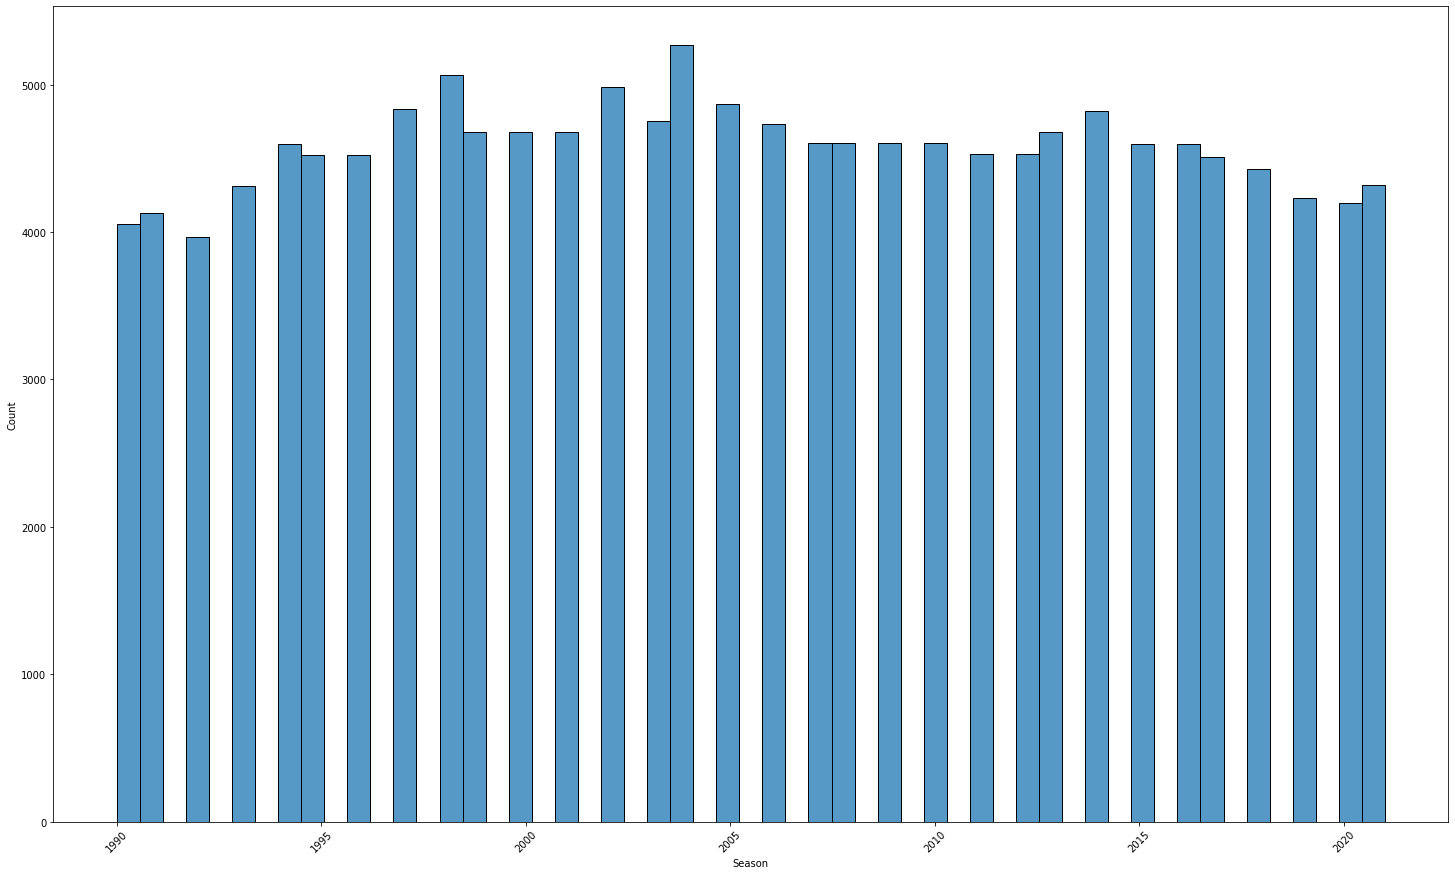

In [13]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Season')
plt.xticks(rotation=45)

df['Season'].value_counts().sort_index()

1.0     4097
2.0     4260
3.0     4243
4.0     4240
5.0     4224
6.0     4137
7.0     4183
8.0     4322
9.0     4349
10.0    3994
11.0    3874
12.0    3874
13.0    3874
14.0    3875
15.0    3871
16.0    3873
17.0    3873
18.0    3872
19.0    3870
20.0    3873
21.0    3872
22.0    3872
23.0    3867
24.0    3866
25.0    3857
26.0    3857
27.0    3841
28.0    3837
29.0    3792
30.0    3773
31.0    3641
32.0    3632
33.0    3613
34.0    3603
35.0    2295
36.0    2287
37.0    2288
38.0    2288
39.0     742
40.0     740
41.0     741
42.0     729
43.0     168
44.0     168
45.0     172
46.0     168
Name: Round, dtype: int64

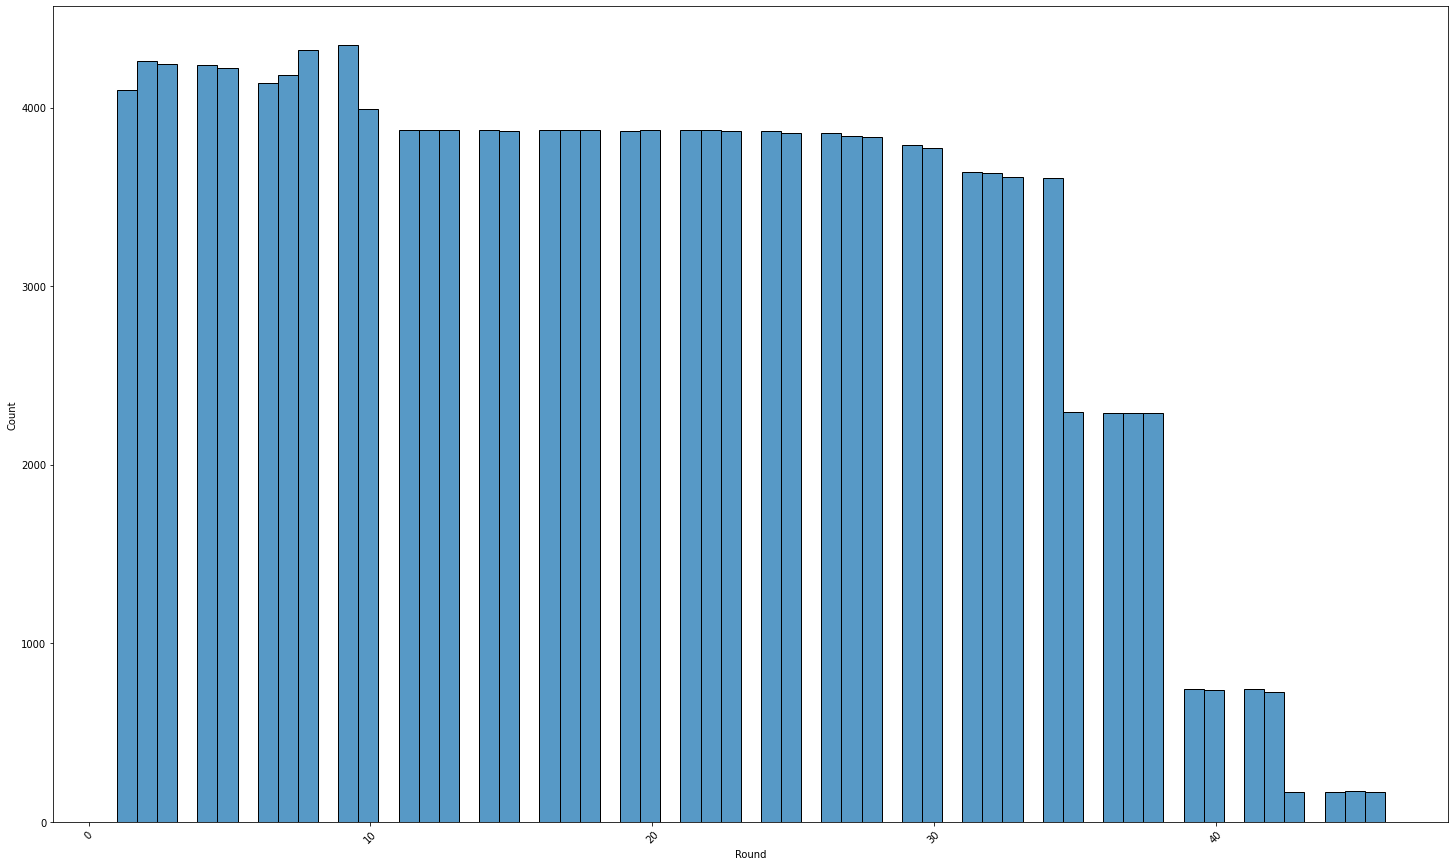

In [14]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Round')
plt.xticks(rotation=45)

df['Round'].value_counts().sort_index()

2_liga              10027
bundesliga           9812
championship         9321
eerste_divisie       6586
eredivisie           9668
ligue_1             11629
ligue_2             10888
premier_league      12416
primeira_liga        9264
primera_division    12243
segunda_division    14038
segunda_liga         7838
serie_a              9365
serie_b             13392
Name: League, dtype: int64

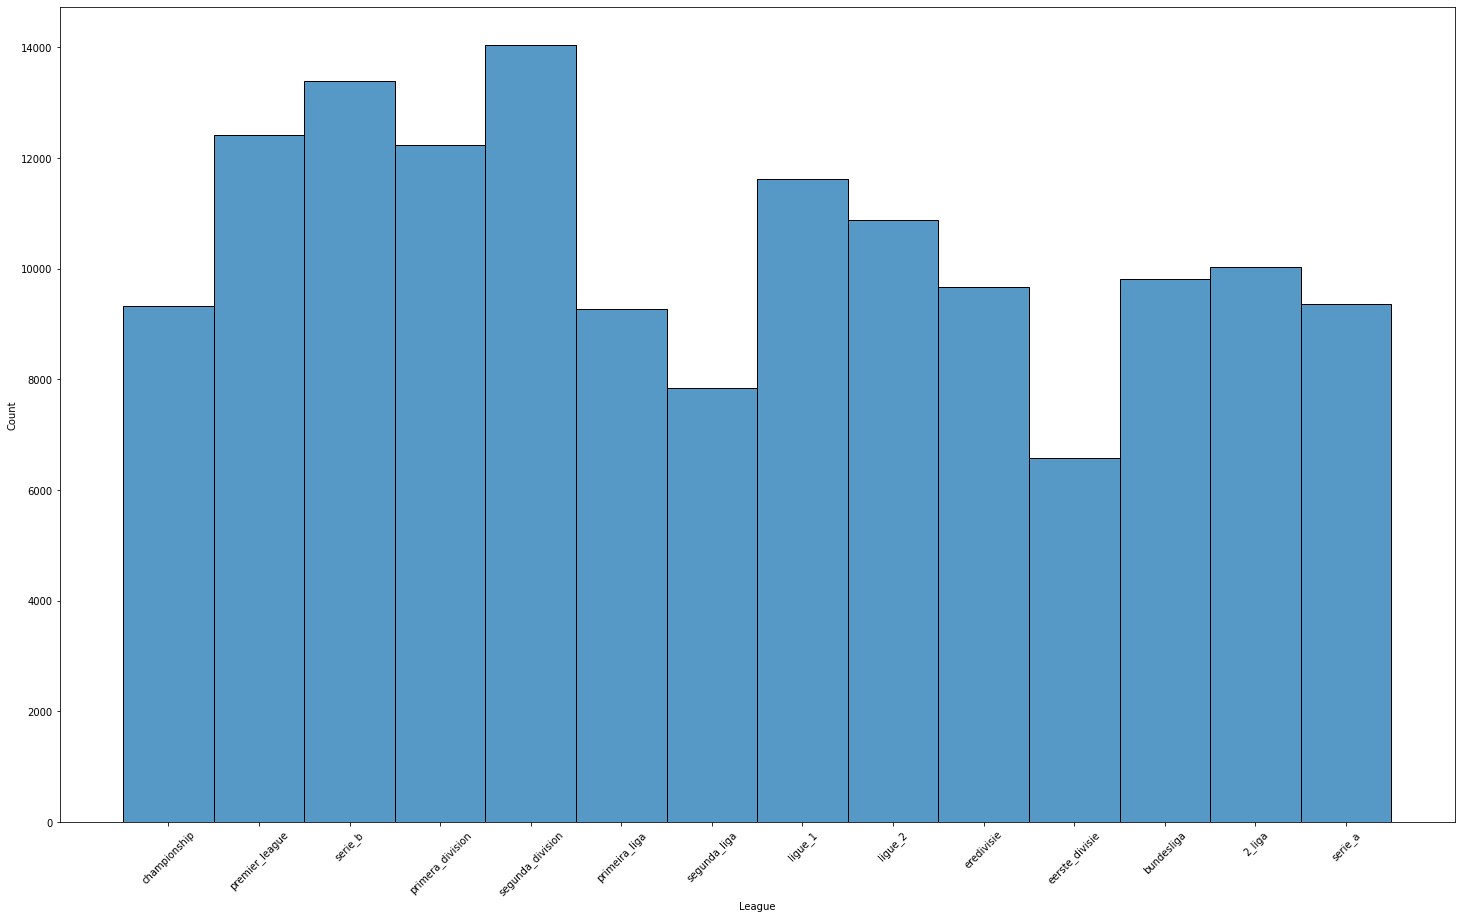

In [15]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='League')
plt.xticks(rotation=45)

df['League'].value_counts().sort_index()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146487 entries, 0 to 146505
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Home_Team         146487 non-null  object 
 1   Away_Team         146487 non-null  object 
 2   Season            146487 non-null  float64
 3   Round             146487 non-null  float64
 4   League            146487 non-null  object 
 5   Date_New          142526 non-null  object 
 6   Referee           142526 non-null  object 
 7   Home_Yellow       122562 non-null  float64
 8   Home_Red          122562 non-null  float64
 9   Away_Yellow       122562 non-null  float64
 10  Away_Red          122562 non-null  float64
 11  City              145513 non-null  object 
 12  Country           145513 non-null  object 
 13  Stadium           135680 non-null  object 
 14  Capacity          145513 non-null  object 
 15  Pitch             136719 non-null  object 
 16  Home_ELO          13

Some of the values in the date new column do not seem plausable (e.g. 388 games happening simulatiously with only a total of 550 teams).

Convert Date_new feature into more useable features:

New features are as follows:
- Time
- Day
- Date
- Month
- Year

In [17]:
def date_split(x, value):
    x = x.split(', ')
    if len(x) == 3:
        if value=='Time':
            return x[-1].strip()
        elif value=='Day':
            return x[0].strip()

        elif value=='Date':
            x = x[1]
            x = x.split(' ')
            return int(x[0].strip())

        elif value=='Month':
            x = x[1]
            x = x.split(' ')
            return x[1].strip()

        elif value=='Year':
            x = x[1]
            x = x.split(' ')
            return int(x[2].strip())

        else:
            return 'NA'

    else:
        if value=='Time':
            return 'NA'

        elif value=='Date':
            x = x[1]
            x = x.split(' ')
            return int(x[0].strip())

        elif value=='Month':
            x = x[1]
            x = x.split(' ')
            return x[1].strip()

        elif value=='Year':
            x = x[1]
            x = x.split(' ')
            return int(x[2].strip())

        else:
            return 'NA'


In [18]:
df['Time'] = df.loc[~df['Date_New'].isna(),'Date_New'].apply(lambda x: date_split(x, 'Time'))
df['Day'] = df.loc[~df['Date_New'].isna(),'Date_New'].apply(lambda x: date_split(x, 'Day'))
df['Date'] = df.loc[~df['Date_New'].isna(),'Date_New'].apply(lambda x: date_split(x, 'Date'))
df['Month'] = df.loc[~df['Date_New'].isna(),'Date_New'].apply(lambda x: date_split(x, 'Month'))
df['Year'] = df.loc[~df['Date_New'].isna(),'Date_New'].apply(lambda x: date_split(x, 'Year'))

df.drop(columns='Date_New', inplace=True)
df = df.loc[df['Day'] != 'NA']

df

,Home_Team,Away_Team,Season,Round,League,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red,...,Home_ELO,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year
0,Millwall,Southend United,1995.0,1.0,championship,\r\n,NaN,NaN,NaN,NaN,...,NaN,NaN,3,1,Win,00:00,Saturday,13.0,August,1994.0
1,Millwall,Derby County,1995.0,3.0,championship,\r\n,NaN,NaN,NaN,NaN,...,NaN,NaN,4,1,Win,00:00,Saturday,27.0,August,1994.0
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,\r\n,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,Draw,00:00,Saturday,10.0,September,1994.0
3,Millwall,Burnley,1995.0,7.0,championship,\r\n,NaN,NaN,NaN,NaN,...,NaN,NaN,2,3,Loss,00:00,Wednesday,14.0,September,1994.0
4,Millwall,Luton Town,1995.0,9.0,championship,\r\n,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,Draw,00:00,Saturday,24.0,September,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,\r\nReferee: Renzo Candussio\r\n,2.0,0.0,2.0,0.0,...,40.0,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0
146502,Nocerina,Empoli,2012.0,34.0,serie_b,\r\nReferee: Dino Tommasi\r\n,3.0,0.0,3.0,0.0,...,40.0,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0
146503,Nocerina,Reggina,2012.0,36.0,serie_b,\r\nReferee: Gianpaolo Calvarese\r\n,1.0,0.0,3.0,0.0,...,41.0,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,\r\nReferee: Marco Di Bello\r\n,2.0,0.0,3.0,0.0,...,40.0,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0


00:00    44551
00:05        1
01:00        1
05:35        1
11:30        4
         ...  
22:30      130
22:45        8
23:00       52
23:15       14
23:30       17
Name: Time, Length: 101, dtype: int64

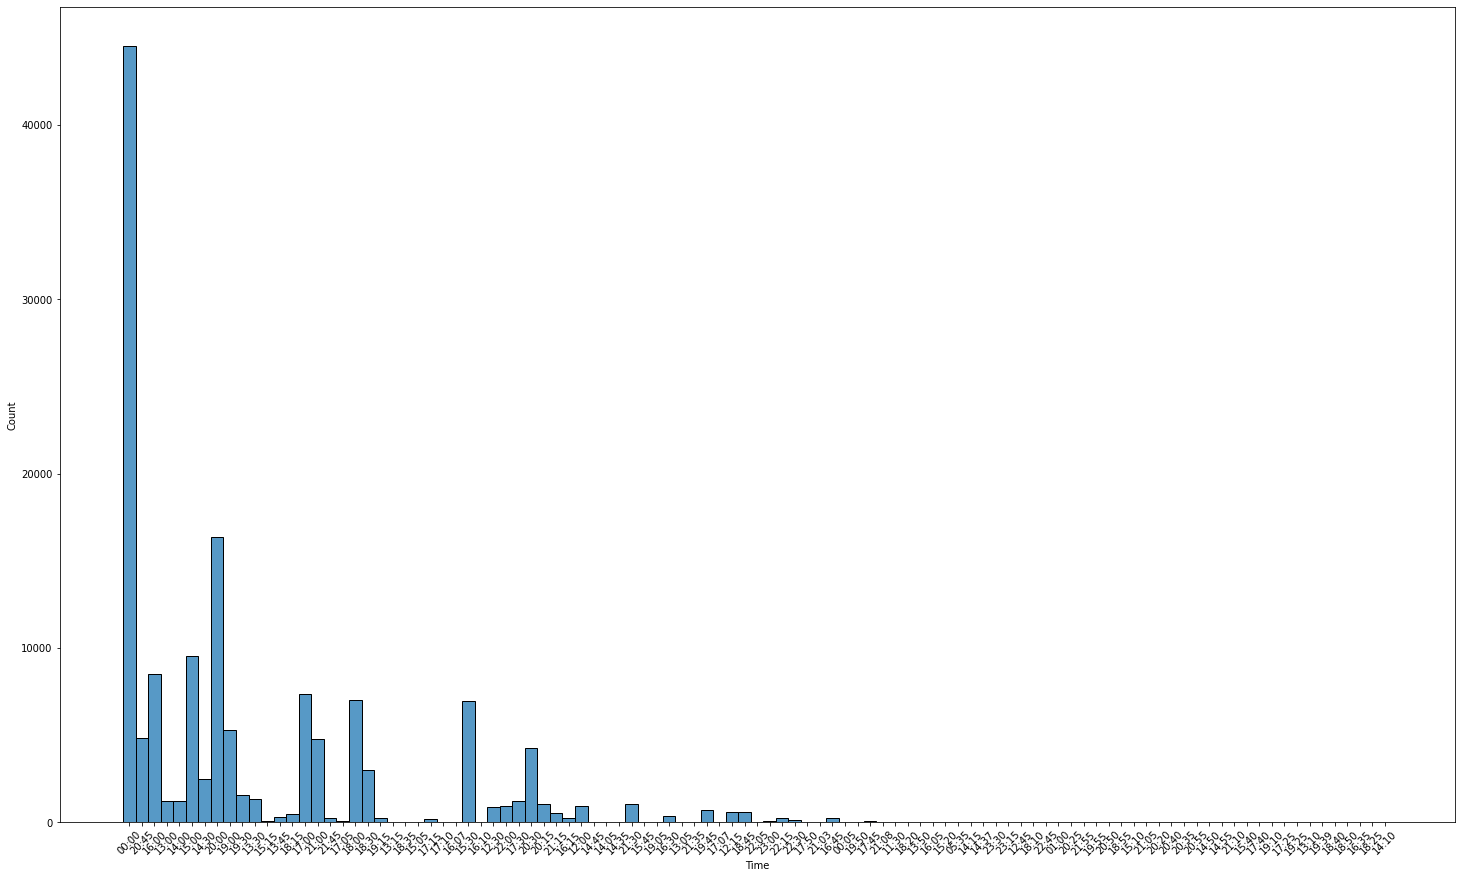

In [19]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Time')
plt.xticks(rotation=45)

df['Time'].value_counts().sort_index()

Friday       16698
Monday        5144
Saturday     54766
Sunday       51628
Thursday      1451
Tuesday       5341
Wednesday     7497
Name: Day, dtype: int64

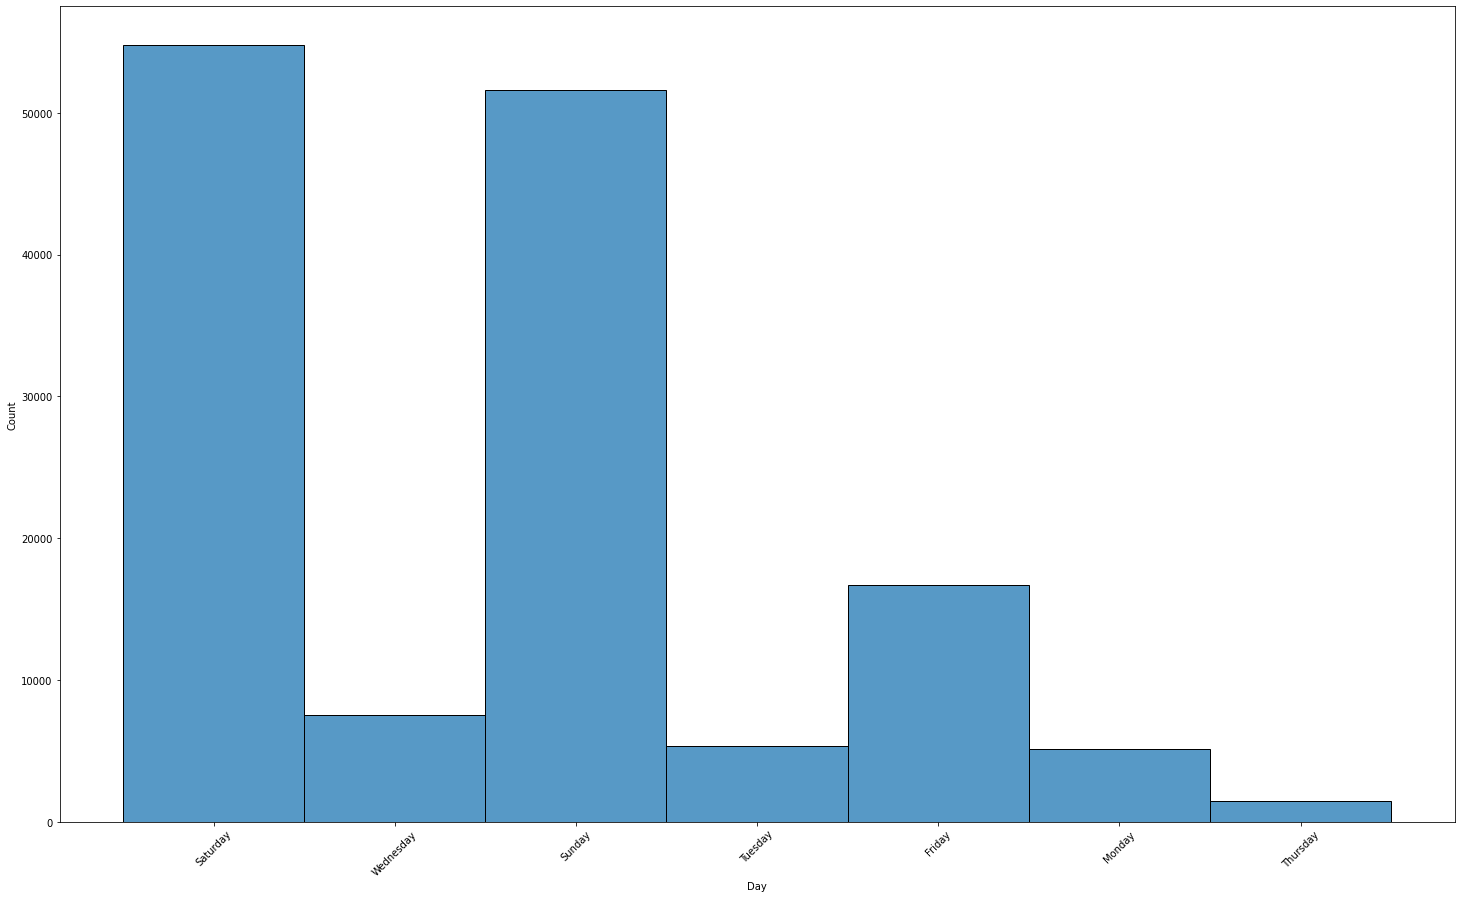

In [20]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Day')
plt.xticks(rotation=45)

df['Day'].value_counts().sort_index()

1.0     4364
2.0     4517
3.0     4385
4.0     4157
5.0     4474
6.0     4748
7.0     4533
8.0     4843
9.0     4719
10.0    5056
11.0    5062
12.0    5133
13.0    4740
14.0    4458
15.0    4536
16.0    4992
17.0    4919
18.0    4505
19.0    5001
20.0    5215
21.0    5307
22.0    5315
23.0    4648
24.0    4749
25.0    4121
26.0    4542
27.0    4181
28.0    4504
29.0    4551
30.0    3948
31.0    2302
Name: Date, dtype: int64

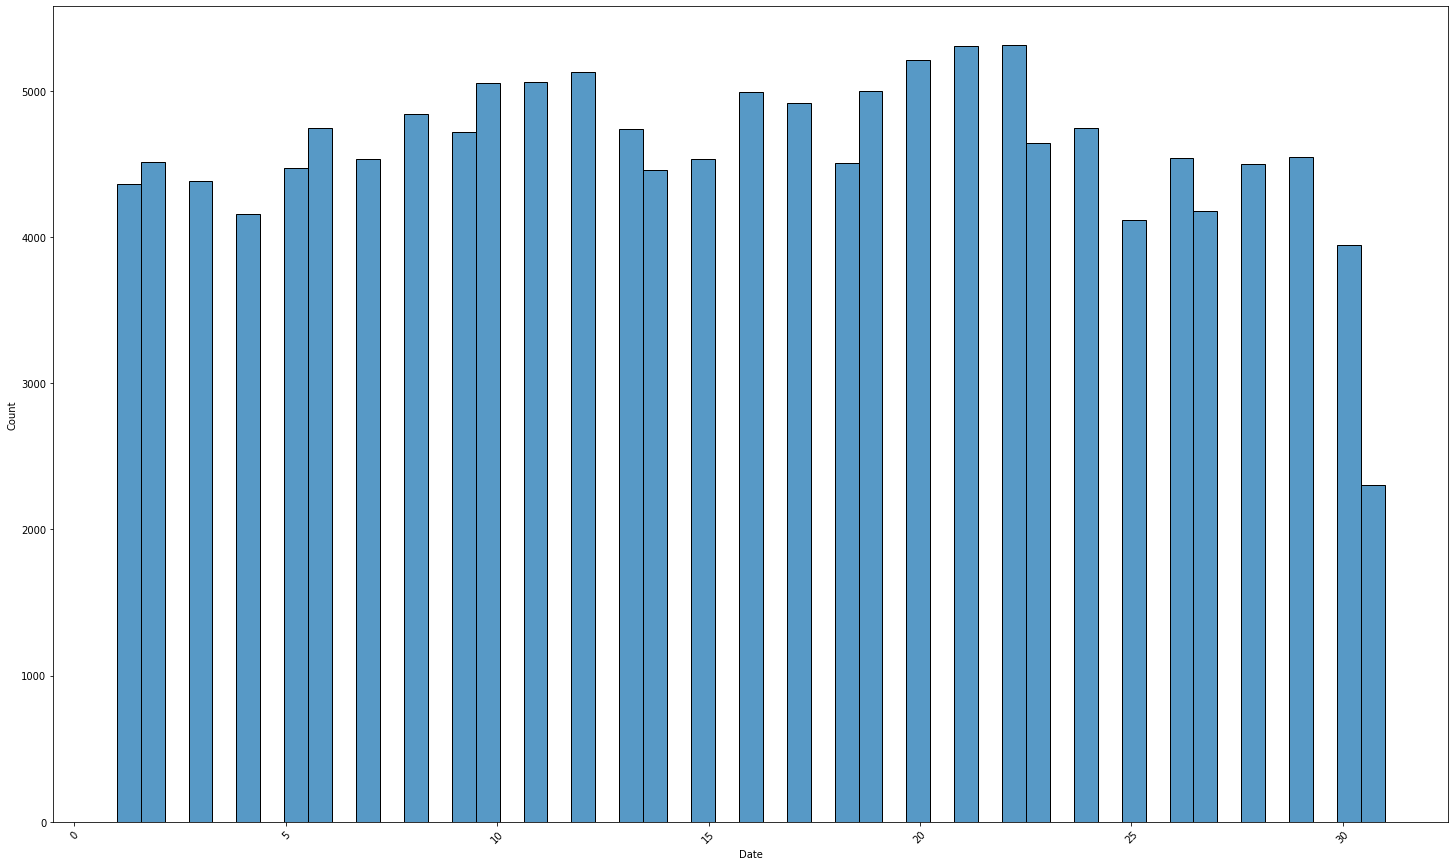

In [21]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Date')
plt.xticks(rotation=45)

df['Date'].value_counts().sort_index()

April        14553
August       22591
December     12738
February     13383
January      10902
July          1324
June          1659
March        13636
May          10524
November     13264
October      13747
September    14204
Name: Month, dtype: int64

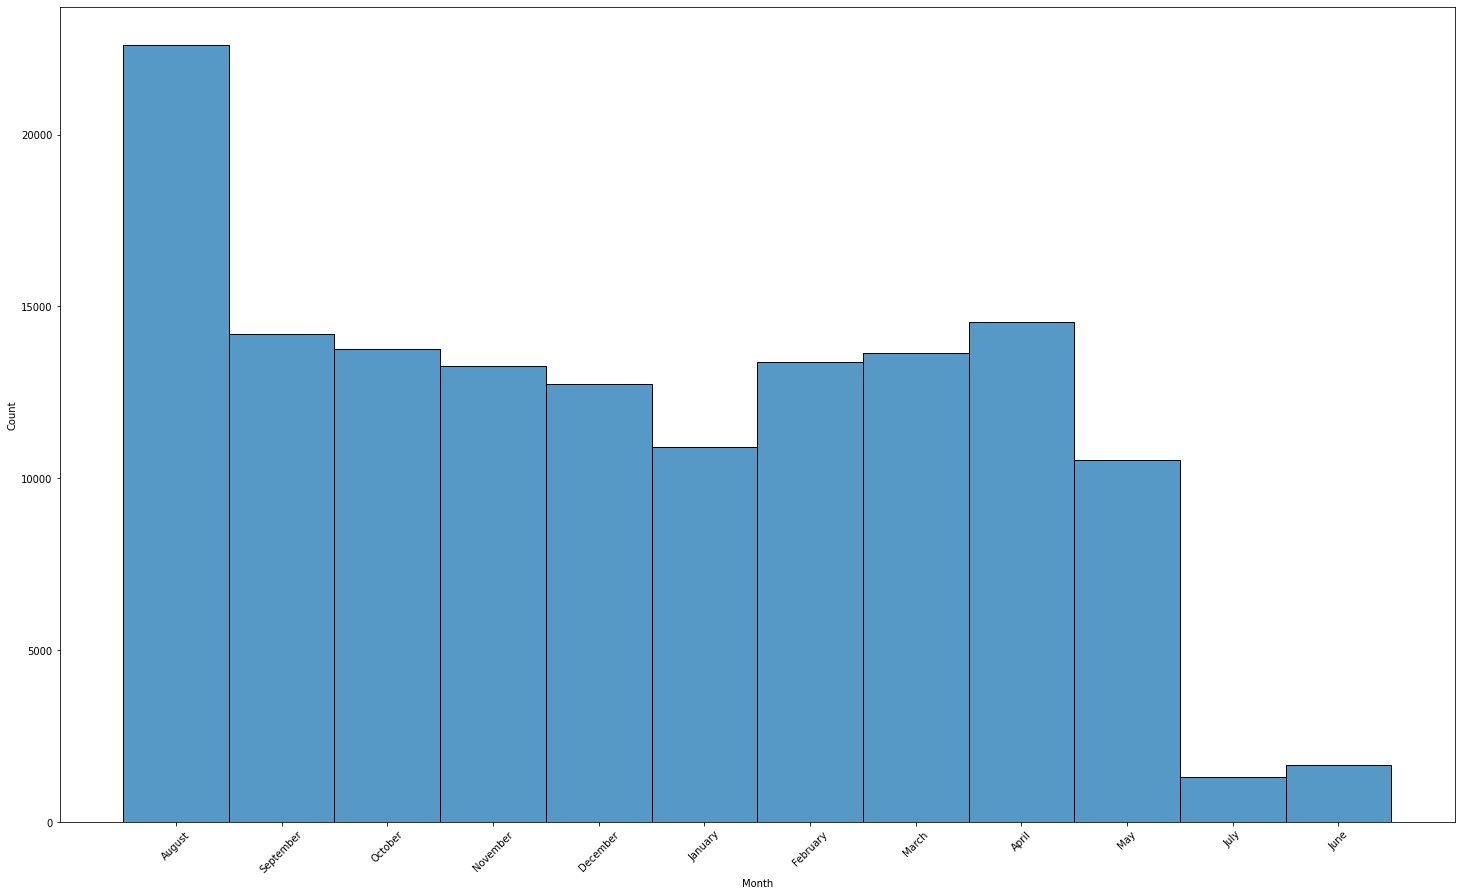

In [22]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Month')
plt.xticks(rotation=45)

df['Month'].value_counts().sort_index()

1989.0    2052
1990.0    3421
1991.0    3762
1992.0    3565
1993.0    4175
1994.0    3966
1995.0    4371
1996.0    4739
1997.0    5159
1998.0    4805
1999.0    4621
2000.0    4690
2001.0    4802
2002.0    4708
2003.0    4954
2004.0    5138
2005.0    4805
2006.0    4647
2007.0    4567
2008.0    4556
2009.0    4608
2010.0    4559
2011.0    4199
2012.0    4648
2013.0    4794
2014.0    4500
2015.0    4623
2016.0    4518
2017.0    4486
2018.0    4248
2019.0    4479
2020.0    4200
2021.0    1160
Name: Year, dtype: int64

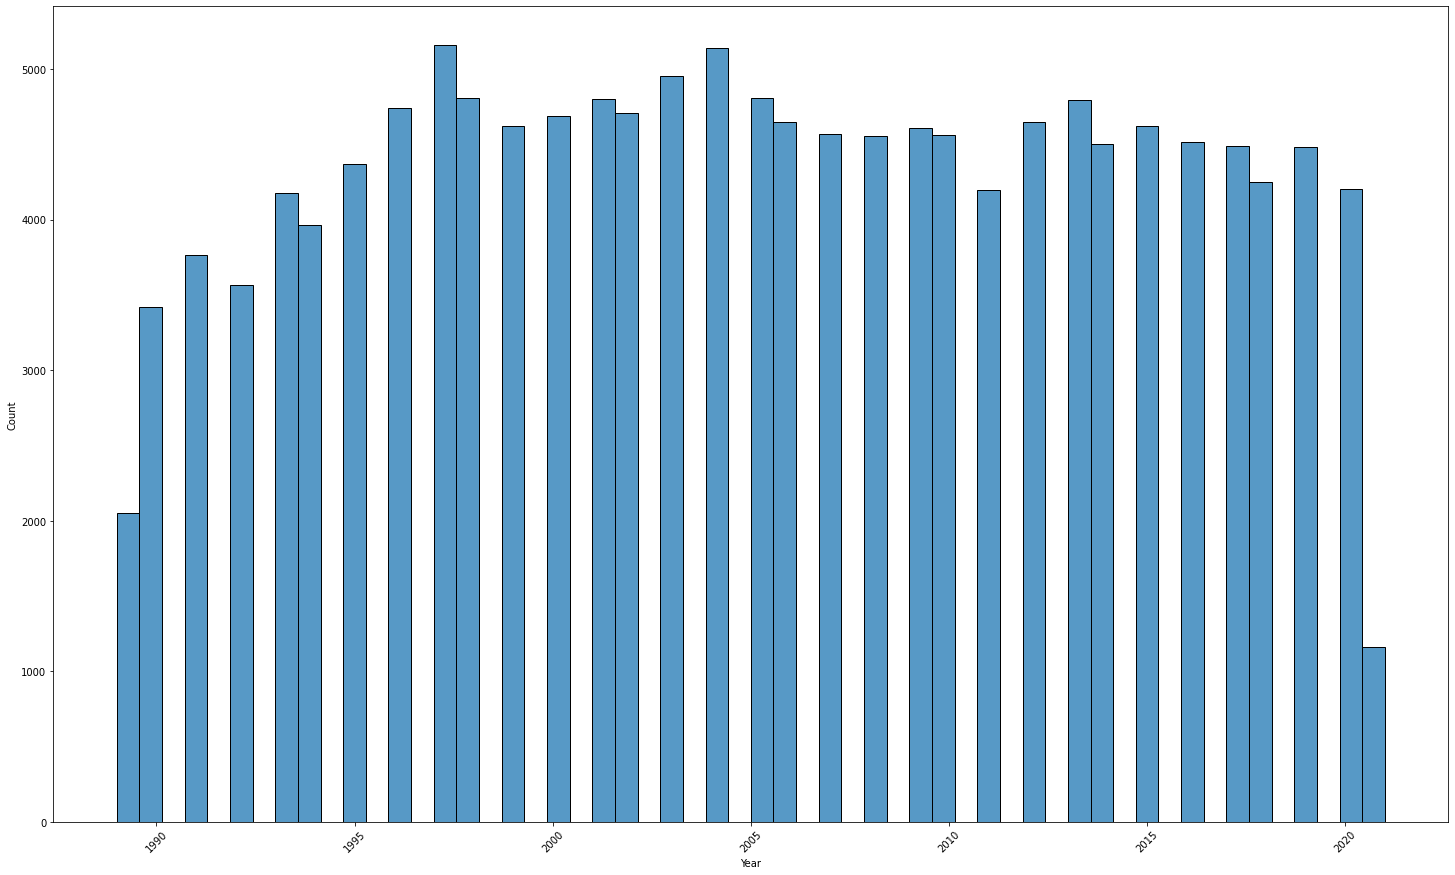

In [23]:
plt.figure(figsize = (25,15))
sns.histplot(data=df, x='Year')
plt.xticks(rotation=45)

df['Year'].value_counts().sort_index()

Drop Referee column as missing lots of values and does not appear to add much value to the result

In [24]:
df.drop(columns='Referee', inplace=True)
df

/tmp/ipykernel_11794/2709013693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Referee', inplace=True)


,Home_Team,Away_Team,Season,Round,League,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,...,Home_ELO,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year
0,Millwall,Southend United,1995.0,1.0,championship,NaN,NaN,NaN,NaN,Londres,...,NaN,NaN,3,1,Win,00:00,Saturday,13.0,August,1994.0
1,Millwall,Derby County,1995.0,3.0,championship,NaN,NaN,NaN,NaN,Londres,...,NaN,NaN,4,1,Win,00:00,Saturday,27.0,August,1994.0
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,NaN,NaN,NaN,NaN,Londres,...,NaN,NaN,2,2,Draw,00:00,Saturday,10.0,September,1994.0
3,Millwall,Burnley,1995.0,7.0,championship,NaN,NaN,NaN,NaN,Londres,...,NaN,NaN,2,3,Loss,00:00,Wednesday,14.0,September,1994.0
4,Millwall,Luton Town,1995.0,9.0,championship,NaN,NaN,NaN,NaN,Londres,...,NaN,NaN,0,0,Draw,00:00,Saturday,24.0,September,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,2.0,0.0,2.0,0.0,Nocera Inferiore,...,40.0,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0
146502,Nocerina,Empoli,2012.0,34.0,serie_b,3.0,0.0,3.0,0.0,Nocera Inferiore,...,40.0,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0
146503,Nocerina,Reggina,2012.0,36.0,serie_b,1.0,0.0,3.0,0.0,Nocera Inferiore,...,41.0,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,2.0,0.0,3.0,0.0,Nocera Inferiore,...,40.0,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146486 entries, 0 to 146505
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Home_Team         146486 non-null  object 
 1   Away_Team         146486 non-null  object 
 2   Season            146486 non-null  float64
 3   Round             146486 non-null  float64
 4   League            146486 non-null  object 
 5   Home_Yellow       122562 non-null  float64
 6   Home_Red          122562 non-null  float64
 7   Away_Yellow       122562 non-null  float64
 8   Away_Red          122562 non-null  float64
 9   City              145512 non-null  object 
 10  Country           145512 non-null  object 
 11  Stadium           135679 non-null  object 
 12  Capacity          145512 non-null  object 
 13  Pitch             136718 non-null  object 
 14  Home_ELO          134864 non-null  float64
 15  Away_ELO          134864 non-null  float64
 16  Home_Team_Score   14

Check Yellow and Red cards and fill null values with the mean.

In [26]:
df['Home_Yellow'].values.reshape(-1,1)

array([[nan],
       [nan],
       [nan],
       ...,
       [ 1.],
       [ 2.],
       [ 1.]])

In [27]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Home_Yellow'] = mean_imputer.fit_transform(df['Home_Yellow'].values.reshape(-1, 1))
df['Home_Red'] = mean_imputer.fit_transform(df['Home_Red'].values.reshape(-1, 1))
df['Away_Yellow'] = mean_imputer.fit_transform(df['Away_Yellow'].values.reshape(-1, 1))
df['Away_Red'] = mean_imputer.fit_transform(df['Away_Red'].values.reshape(-1, 1))
df

/tmp/ipykernel_11794/147749765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home_Yellow'] = mean_imputer.fit_transform(df['Home_Yellow'].values.reshape(-1, 1))
/tmp/ipykernel_11794/147749765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home_Red'] = mean_imputer.fit_transform(df['Home_Red'].values.reshape(-1, 1))
/tmp/ipykernel_11794/147749765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Home_Team,Away_Team,Season,Round,League,Home_Yellow,Home_Red,Away_Yellow,Away_Red,City,...,Home_ELO,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year
0,Millwall,Southend United,1995.0,1.0,championship,1.723568,0.067117,2.08971,0.093088,Londres,...,NaN,NaN,3,1,Win,00:00,Saturday,13.0,August,1994.0
1,Millwall,Derby County,1995.0,3.0,championship,1.723568,0.067117,2.08971,0.093088,Londres,...,NaN,NaN,4,1,Win,00:00,Saturday,27.0,August,1994.0
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,1.723568,0.067117,2.08971,0.093088,Londres,...,NaN,NaN,2,2,Draw,00:00,Saturday,10.0,September,1994.0
3,Millwall,Burnley,1995.0,7.0,championship,1.723568,0.067117,2.08971,0.093088,Londres,...,NaN,NaN,2,3,Loss,00:00,Wednesday,14.0,September,1994.0
4,Millwall,Luton Town,1995.0,9.0,championship,1.723568,0.067117,2.08971,0.093088,Londres,...,NaN,NaN,0,0,Draw,00:00,Saturday,24.0,September,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,2.000000,0.000000,2.00000,0.000000,Nocera Inferiore,...,40.0,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0
146502,Nocerina,Empoli,2012.0,34.0,serie_b,3.000000,0.000000,3.00000,0.000000,Nocera Inferiore,...,40.0,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0
146503,Nocerina,Reggina,2012.0,36.0,serie_b,1.000000,0.000000,3.00000,0.000000,Nocera Inferiore,...,41.0,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,2.000000,0.000000,3.00000,0.000000,Nocera Inferiore,...,40.0,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146486 entries, 0 to 146505
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Home_Team         146486 non-null  object 
 1   Away_Team         146486 non-null  object 
 2   Season            146486 non-null  float64
 3   Round             146486 non-null  float64
 4   League            146486 non-null  object 
 5   Home_Yellow       146486 non-null  float64
 6   Home_Red          146486 non-null  float64
 7   Away_Yellow       146486 non-null  float64
 8   Away_Red          146486 non-null  float64
 9   City              145512 non-null  object 
 10  Country           145512 non-null  object 
 11  Stadium           135679 non-null  object 
 12  Capacity          145512 non-null  object 
 13  Pitch             136718 non-null  object 
 14  Home_ELO          134864 non-null  float64
 15  Away_ELO          134864 non-null  float64
 16  Home_Team_Score   14

Drop the city column and replace with a region column that is based on the league column

In [29]:
df['City'].value_counts()

Londres      4276
Lisboa       2026
Madrid       1537
Rótterdam    1365
Sevilla      1314
             ... 
Potsdam        17
Schiedam       17
Magdeburg      17
Pau            16
Halle          11
Name: City, Length: 451, dtype: int64

In [30]:
df['Region'] = df['League']
values_to_update ={
    'Region': {
        'segunda_division': 'Spain',
        'primera_division': 'Spain',
        'serie_b': 'Italy',
        'serie_a': 'Italy',
        'premier_league': 'England',
        'championship': 'England',
        'ligue_1': 'France',
        'ligue_2': 'France',
        '2_liga': 'Germany',
        'bundesliga': 'Germany',
        'eredivisie': 'Netherlands',
        'eerste_divisie': 'Netherlands',
        'primeira_liga': 'Portugal',
        'segunda_liga': 'Portugal'        
        }
}

df = df.replace(values_to_update)
df.drop(columns='City', inplace=True)
df

/tmp/ipykernel_11794/608191924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['League']


,Home_Team,Away_Team,Season,Round,League,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Country,...,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year,Region
0,Millwall,Southend United,1995.0,1.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,3,1,Win,00:00,Saturday,13.0,August,1994.0,England
1,Millwall,Derby County,1995.0,3.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,4,1,Win,00:00,Saturday,27.0,August,1994.0,England
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,2,2,Draw,00:00,Saturday,10.0,September,1994.0,England
3,Millwall,Burnley,1995.0,7.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,2,3,Loss,00:00,Wednesday,14.0,September,1994.0,England
4,Millwall,Luton Town,1995.0,9.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,0,0,Draw,00:00,Saturday,24.0,September,1994.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,2.000000,0.000000,2.00000,0.000000,Italy,...,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0,Italy
146502,Nocerina,Empoli,2012.0,34.0,serie_b,3.000000,0.000000,3.00000,0.000000,Italy,...,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0,Italy
146503,Nocerina,Reggina,2012.0,36.0,serie_b,1.000000,0.000000,3.00000,0.000000,Italy,...,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0,Italy
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,2.000000,0.000000,3.00000,0.000000,Italy,...,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0,Italy


Drop stadium column as unlikely to add additional value compared with home team name alone. 

Convert Capacity column to numerical values

In [31]:
def num_filter(x):
    numeric_filter = filter(str.isdigit, str(x))
    numeric_string = "".join(numeric_filter)
    return numeric_string

df['Capacity'] = df['Capacity'].apply(lambda x: num_filter(x))
df['Capacity'].value_counts().sort_index()

          974
1000      155
10000    1854
10134      68
10153     161
         ... 
9779      126
9798       84
9926      105
99787     608
9998       21
Name: Capacity, Length: 433, dtype: int64

In [32]:
df.drop(columns='Stadium', inplace=True)
df


,Home_Team,Away_Team,Season,Round,League,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Country,...,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year,Region
0,Millwall,Southend United,1995.0,1.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,3,1,Win,00:00,Saturday,13.0,August,1994.0,England
1,Millwall,Derby County,1995.0,3.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,4,1,Win,00:00,Saturday,27.0,August,1994.0,England
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,2,2,Draw,00:00,Saturday,10.0,September,1994.0,England
3,Millwall,Burnley,1995.0,7.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,2,3,Loss,00:00,Wednesday,14.0,September,1994.0,England
4,Millwall,Luton Town,1995.0,9.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,0,0,Draw,00:00,Saturday,24.0,September,1994.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,2.000000,0.000000,2.00000,0.000000,Italy,...,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0,Italy
146502,Nocerina,Empoli,2012.0,34.0,serie_b,3.000000,0.000000,3.00000,0.000000,Italy,...,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0,Italy
146503,Nocerina,Reggina,2012.0,36.0,serie_b,1.000000,0.000000,3.00000,0.000000,Italy,...,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0,Italy
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,2.000000,0.000000,3.00000,0.000000,Italy,...,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0,Italy


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146486 entries, 0 to 146505
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Home_Team         146486 non-null  object 
 1   Away_Team         146486 non-null  object 
 2   Season            146486 non-null  float64
 3   Round             146486 non-null  float64
 4   League            146486 non-null  object 
 5   Home_Yellow       146486 non-null  float64
 6   Home_Red          146486 non-null  float64
 7   Away_Yellow       146486 non-null  float64
 8   Away_Red          146486 non-null  float64
 9   Country           145512 non-null  object 
 10  Capacity          146486 non-null  object 
 11  Pitch             136718 non-null  object 
 12  Home_ELO          134864 non-null  float64
 13  Away_ELO          134864 non-null  float64
 14  Home_Team_Score   146486 non-null  int64  
 15  Away_Team_Score   146486 non-null  int64  
 16  Home_Team_Result  14

Alomst all of the pitches are natural so this variable is unliekly to add much value to the analysis

Drop Pitch column

In [36]:
df['Pitch'].value_counts()

Natural              120461
Césped Artificial      4631
Grass                  4380
Césped natural         2921
grass                  1303
Césped Natural         1041
AirFibr                 376
cesped real             252
Césped                  244
cesped natural          240
natural grass           221
Cesped natural          217
NATURAL                 170
natural                 156
Natural grass            63
Artificial               42
Name: Pitch, dtype: int64

In [37]:
df.drop(columns='Pitch', inplace=True)
df

,Home_Team,Away_Team,Season,Round,League,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Country,...,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year,Region
0,Millwall,Southend United,1995.0,1.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,3,1,Win,00:00,Saturday,13.0,August,1994.0,England
1,Millwall,Derby County,1995.0,3.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,4,1,Win,00:00,Saturday,27.0,August,1994.0,England
2,Millwall,West Bromwich Alb.,1995.0,6.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,2,2,Draw,00:00,Saturday,10.0,September,1994.0,England
3,Millwall,Burnley,1995.0,7.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,2,3,Loss,00:00,Wednesday,14.0,September,1994.0,England
4,Millwall,Luton Town,1995.0,9.0,championship,1.723568,0.067117,2.08971,0.093088,England,...,NaN,0,0,Draw,00:00,Saturday,24.0,September,1994.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,2.000000,0.000000,2.00000,0.000000,Italy,...,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0,Italy
146502,Nocerina,Empoli,2012.0,34.0,serie_b,3.000000,0.000000,3.00000,0.000000,Italy,...,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0,Italy
146503,Nocerina,Reggina,2012.0,36.0,serie_b,1.000000,0.000000,3.00000,0.000000,Italy,...,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0,Italy
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,2.000000,0.000000,3.00000,0.000000,Italy,...,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0,Italy


ELO values are an important feature that is available in advance of the fixture therefore will drop the rows that do not contain value

In [40]:
df.dropna(subset=['Home_ELO', 'Away_ELO'], inplace=True)
df

,Home_Team,Away_Team,Season,Round,League,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Country,...,Away_ELO,Home_Team_Score,Away_Team_Score,Home_Team_Result,Time,Day,Date,Month,Year,Region
46,Millwall,Rotherham United,2003.0,1.0,championship,3.0,0.0,1.0,0.0,England,...,46.0,0,6,Loss,16:00,Saturday,10.0,August,2002.0,England
47,Millwall,Ipswich Town,2003.0,4.0,championship,0.0,0.0,0.0,0.0,England,...,67.0,1,1,Draw,16:00,Saturday,24.0,August,2002.0,England
48,Millwall,Grimsby Town,2003.0,6.0,championship,2.0,0.0,0.0,0.0,England,...,51.0,2,0,Win,16:00,Saturday,31.0,August,2002.0,England
49,Millwall,Brighton Hove Alb.,2003.0,7.0,championship,1.0,0.0,2.0,1.0,England,...,41.0,1,0,Win,16:00,Saturday,7.0,September,2002.0,England
50,Millwall,Walsall,2003.0,10.0,championship,2.0,0.0,1.0,0.0,England,...,50.0,0,3,Loss,16:00,Saturday,21.0,September,2002.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146501,Nocerina,Hellas Verona,2012.0,32.0,serie_b,2.0,0.0,2.0,0.0,Italy,...,54.0,3,1,Win,15:00,Saturday,24.0,March,2012.0,Italy
146502,Nocerina,Empoli,2012.0,34.0,serie_b,3.0,0.0,3.0,0.0,Italy,...,63.0,2,1,Win,19:00,Friday,6.0,April,2012.0,Italy
146503,Nocerina,Reggina,2012.0,36.0,serie_b,1.0,0.0,3.0,0.0,Italy,...,59.0,0,4,Loss,15:00,Saturday,21.0,April,2012.0,Italy
146504,Nocerina,AlbinoLeffe,2012.0,39.0,serie_b,2.0,0.0,3.0,0.0,Italy,...,53.0,1,0,Win,15:00,Saturday,5.0,May,2012.0,Italy


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134864 entries, 46 to 146505
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Home_Team         134864 non-null  object 
 1   Away_Team         134864 non-null  object 
 2   Season            134864 non-null  float64
 3   Round             134864 non-null  float64
 4   League            134864 non-null  object 
 5   Home_Yellow       134864 non-null  float64
 6   Home_Red          134864 non-null  float64
 7   Away_Yellow       134864 non-null  float64
 8   Away_Red          134864 non-null  float64
 9   Country           134011 non-null  object 
 10  Capacity          134864 non-null  object 
 11  Home_ELO          134864 non-null  float64
 12  Away_ELO          134864 non-null  float64
 13  Home_Team_Score   134864 non-null  int64  
 14  Away_Team_Score   134864 non-null  int64  
 15  Home_Team_Result  134864 non-null  object 
 16  Time              1

In [42]:
df.describe()

,Season,Round,Home_Yellow,Home_Red,Away_Yellow,Away_Red,Home_ELO,Away_ELO,Home_Team_Score,Away_Team_Score,Date,Year
count,134864.000000,134864.000000,134864.000000,134864.000000,134864.000000,134864.000000,134864.000000,134864.000000,134864.000000,134864.000000,133265.000000,133265.000000
mean,2006.122583,18.785591,1.739910,0.067880,2.107539,0.093207,66.959085,66.998272,1.502773,1.074690,15.706855,2005.515041
std,9.068537,10.988098,1.231126,0.243958,1.312195,0.285440,13.260612,13.262842,1.261583,1.088189,8.642026,9.030663
min,1990.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000,34.000000,0.000000,0.000000,1.000000,1989.000000
25%,1999.000000,9.000000,1.000000,0.000000,1.000000,0.000000,56.000000,56.000000,1.000000,0.000000,8.000000,1998.000000
50%,2007.000000,18.000000,1.723568,0.000000,2.000000,0.000000,67.000000,67.000000,1.000000,1.000000,16.000000,2006.000000
75%,2014.000000,28.000000,2.000000,0.000000,3.000000,0.000000,77.000000,77.000000,2.000000,2.000000,23.000000,2013.000000
max,2021.000000,46.000000,10.000000,3.000000,10.000000,4.000000,100.000000,100.000000,9.000000,9.000000,31.000000,2021.000000


### Exploratory Data Analysis

In [ ]:
# Win percentage
df_win = df.groupby(by=['Region', 'Year'])['Home_Team_Result_Win', 'Home_Team_Result_Draw', 'Home_Team_Result_Loss'].sum().reset_index()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 9))
fig.suptitle('Match Result Variation - Annual')
ax[0].set_title('No. Home Team Wins per Season')
ax[1].set_title('No. Home Team Draws per Season')
ax[2].set_title('No. Home Team Losses per Season')
sns.barplot(ax=ax[0], data=df_win, x='Year', y='Home_Team_Result_Win')
sns.barplot(ax=ax[1], data=df_win, x='Year', y='Home_Team_Result_Draw')
sns.barplot(ax=ax[2], data=df_win, x='Year', y='Home_Team_Result_Loss')

In [ ]:
# How many goals were scored in each region?

df_goals = df.groupby(by=['Region', 'Year'])['Home_Team_Score', 'Away_Team_Score'].sum().reset_index()
df_home_goals = df_goals.pivot_table(values='Home_Team_Score', index='Year', columns='Region')
df_away_goals = df_goals.pivot_table(values='Away_Team_Score', index='Year', columns='Region')

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16, 9))
fig.suptitle('Total goals scored in each region annually')
ax[0].set_title('Total Goals Scored (Home)')
ax[1].set_title('Total Goals Scored (Away)')
sns.lineplot(ax=ax[0], data=df_home_goals)
sns.lineplot(ax=ax[1], data=df_away_goals)

In [ ]:
# How many games were played in each region?

df_games = df.groupby(by=['Region', 'Year'])['League'].count().to_frame().reset_index()
df_games = df_games.pivot_table(values='League', index='Year', columns='Region')

sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data=df_games)

In [ ]:
# How many goals are scored per game in each region?

df_goals = df.groupby(by=['Region', 'Year'])['Home_Team_Score', 'Away_Team_Score'].mean().reset_index()
df_home_goals = df_goals.pivot_table(values='Home_Team_Score', index='Year', columns='Region')
df_away_goals = df_goals.pivot_table(values='Away_Team_Score', index='Year', columns='Region')

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16, 9))
fig.suptitle('Total goals scored in each region annually')
ax[0].set_title('Total Goals Scored (Home)')
ax[1].set_title('Total Goals Scored (Away)')
sns.lineplot(ax=ax[0], data=df_home_goals)
sns.lineplot(ax=ax[1], data=df_away_goals)

In [ ]:
# How many goals were scored in each League?

df_goals = df.groupby(by=['League', 'Year'])['Home_Team_Score', 'Away_Team_Score'].sum().reset_index()
df_home_goals = df_goals.pivot_table(values='Home_Team_Score', index='Year', columns='League')
df_away_goals = df_goals.pivot_table(values='Away_Team_Score', index='Year', columns='League')

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16, 18))
fig.suptitle('Total goals scored in each region annually')
ax[0].set_title('Total Goals Scored (Home)')
ax[1].set_title('Total Goals Scored (Away)')
sns.lineplot(ax=ax[0], data=df_home_goals)
sns.lineplot(ax=ax[1], data=df_away_goals)

In [ ]:
# How many games were played in each league?

df_games = df.groupby(by=['League', 'Year'])['Link'].count().to_frame().reset_index()
df_games = df_games.pivot_table(values='Link', index='Year', columns='League')

sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data=df_games)

In [ ]:
# How many goals are scored per game in each league?

df_goals = df.groupby(by=['League', 'Year'])['Home_Team_Score', 'Away_Team_Score'].mean().reset_index()
df_home_goals = df_goals.pivot_table(values='Home_Team_Score', index='Year', columns='League')
df_away_goals = df_goals.pivot_table(values='Away_Team_Score', index='Year', columns='League')

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16, 18))
fig.suptitle('Total goals scored in each region annually')
ax[0].set_title('Total Goals Scored (Home)')
ax[1].set_title('Total Goals Scored (Away)')
sns.lineplot(ax=ax[0], data=df_home_goals)
sns.lineplot(ax=ax[1], data=df_away_goals)

In [ ]:
# How many teams played in each league?
teams_year_table = pd.pivot_table(df, values='Home_Team', index='Year', columns='League', aggfunc=lambda x: len(x.unique()))
teams_year_table


sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data=teams_year_table)

In [ ]:
# Which league has each team appeared in?
df_teams = df.groupby(by=['Home_Team', 'Year'])['League'].min()
df_teams = df_teams.to_frame().reset_index()
df_teams = df_teams.groupby(by=['Home_Team', 'League'])['Year'].count()
df_teams = df_teams.unstack(level=1)
df_teams.fillna(value=0, inplace=True)
df_teams


In [ ]:
# How many goals were scored by home and away teams in each league?

df_home_goals = df.groupby(by=['Region', 'League', 'Home_Team', 'Year'])['Home_Team_Score'].sum()
df_home_goals = df_home_goals.to_frame().reset_index()
df_home_goals

In [ ]:
df_away_goals = df.groupby(by=['Region', 'League', 'Away_Team', 'Year'])['Away_Team_Score'].sum()
df_away_goals = df_away_goals.to_frame().reset_index()
df_away_goals

In [ ]:
# Who is the most (and least) successful team in each league?
df_home = df.loc[:,['Home_Team', 'Home_Team_Score', 'Away_Team_Score', 'League', 'Region', 'Year', 'Round']]
df_home.rename(columns={'Home_Team': 'Team', 'Home_Team_Score': 'GS', 'Away_Team_Score': 'GC'}, inplace=True)
df_away = df.loc[:,['Away_Team', 'Away_Team_Score', 'Home_Team_Score', 'League', 'Region', 'Year', 'Round']]
df_away.rename(columns={'Away_Team': 'Team', 'Away_Team_Score': 'GS', 'Home_Team_Score': 'GC'}, inplace=True)
df_points = pd.concat([df_home, df_away]).reset_index(drop=True)

def win_func(x):
    if x['GS'] > x['GC']:
        return 3
    elif x['GS'] == x['GC']:
        return 1
    else:
        return 0

df_points['Result'] = df_points.apply(lambda row: win_func(row), axis=1)
df_points

In [ ]:
df_result = df_points.groupby(by=['Region', 'League', 'Team', 'Year'])['Result'].sum()
df_result